## Đọc file chứa thông tin nhân viên và phòng ban

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Đọc file excel employees.xls trong thư mục thuc_hanh_1
emps = pd.read_excel('thuc_hanh_1/employees.xls')
print(emps.shape)
print(emps.head())

(107, 11)
   EMPLOYEE_ID FIRST_NAME LAST_NAME     EMAIL  PHONE_NUMBER  \
0          100     Steven      King     SKING  515.123.4567   
1          101      Neena   Kochhar  NKOCHHAR  515.123.4568   
2          102        Lex   De Haan   LDEHAAN  515.123.4569   
3          103  Alexander    Hunold   AHUNOLD  590.423.4567   
4          104      Bruce     Ernst    BERNST  590.423.4568   

             HIRE_DATE   JOB_ID  SALARY  COMMISSION_PCT  MANAGER_ID  \
0  2003-06-17 00:00:00  AD_PRES   24000             NaN         NaN   
1  2005-09-21 00:00:00    AD_VP   17000             NaN       100.0   
2  2001-01-13 00:00:00    AD_VP   17000             NaN       100.0   
3  2006-01-03 00:00:00  IT_PROG    9000             NaN       102.0   
4  2007-05-21 00:00:00  IT_PROG    6000             NaN       103.0   

   DEPARTMENT_ID  
0           90.0  
1           90.0  
2           90.0  
3           60.0  
4           60.0  


In [3]:
# Đọc file excel departments.xls trong thư mục thuc_hanh_1
deps = pd.read_excel('thuc_hanh_1/departments.xls')
print(deps.shape)
print(deps.head())

(27, 4)
   DEPARTMENT_ID  DEPARTMENT_NAME  MANAGER_ID  LOCATION_ID
0             10   Administration       200.0         1700
1             20        Marketing       201.0         1800
2             30       Purchasing       114.0         1700
3             40  Human Resources       203.0         2400
4             50         Shipping       121.0         1500


## Trực quan

### Vẽ biểu đồ biểu diễn tổng lương của mỗi phòng ban

In [4]:
### Chuẩn bị data
# Kết 2 bảng nhân viên. phòng ban theo mã phòng ban
# lấy hết các cột trong bảng nhân viên và chỉ lấy 2 cột là mã phòng và tên phòng trong bảng phòng ban
df_NV_PB = pd.merge(emps, deps[['DEPARTMENT_ID','DEPARTMENT_NAME']], on=['DEPARTMENT_ID'])
print(df_NV_PB.shape) # Chỉ có 106 dòng trong khi có 107 nhân viên do có 1 nhân viên có mã phòng = NaN (mặc định merge inner)

# => Dùng left join
df_NV_PB = pd.merge(emps, deps[['DEPARTMENT_ID','DEPARTMENT_NAME']], on=['DEPARTMENT_ID'], how='left')
print(df_NV_PB.shape)

# Cho biết thông tin ra nhân viên ko có mã phòng
print(df_NV_PB[df_NV_PB['DEPARTMENT_ID'].isnull()])

(106, 12)
(107, 12)
    EMPLOYEE_ID FIRST_NAME LAST_NAME   EMAIL        PHONE_NUMBER  \
78          178  Kimberely     Grant  KGRANT  011.44.1644.429263   

              HIRE_DATE  JOB_ID  SALARY  COMMISSION_PCT  MANAGER_ID  \
78  2007-05-24 00:00:00  SA_REP    7000            0.15       149.0   

    DEPARTMENT_ID DEPARTMENT_NAME  
78            NaN             NaN  


In [5]:
### Tính tổng lương của các phòng
df_sum_SAL = df_NV_PB.groupby('DEPARTMENT_NAME')['SALARY'].sum()
# Hoặc 
# df_sum_SAL = df_NV_PB.groupby('DEPARTMENT_NAME').SALARY.sum()
df_sum_SAL

DEPARTMENT_NAME
Accounting           20308
Administration        4400
Executive            58000
Finance              51608
Human Resources       6500
IT                   28800
Marketing            19000
Public Relations     10000
Purchasing           24900
Sales               304500
Shipping            156400
Name: SALARY, dtype: int64

In [6]:
### Vẽ biểu đồ cột cho tổng lương tùng phòng ban
df_sum_SAL.plot.bar()

### Vẽ biểu đồ biểu diễn tổng lương và số nhân viên của mỗi phòng ban

In [7]:
### Chuẩn bị data
# Tính tổng lương và số nhân viên
df_sum_count = df_NV_PB.groupby('DEPARTMENT_NAME')['SALARY'].agg(['sum','count'])
# agg cho phép thực hiện nhiều phép toán

df_sum_count

,sum,count
DEPARTMENT_NAME,,
Accounting,20308,2
Administration,4400,1
Executive,58000,3
Finance,51608,6
Human Resources,6500,1
IT,28800,5
Marketing,19000,2
Public Relations,10000,1
Purchasing,24900,6


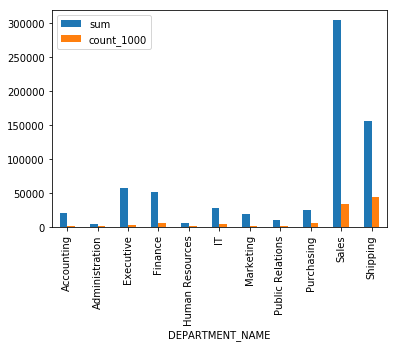

In [8]:
# df_sum_count.plot.bar() # Khó thấy cột count nhân viên vì tỉ lệ quá nhỏ so với tổng lương

# => count * 1000
df_sum_count['count_1000'] = df_sum_count['count'] * 1000
df_sum_count[['sum','count_1000']].plot.bar()

### Vẽ biểu đồ biểu diễn số nhân viên vào làm theo từng năm

In [10]:
### Chuẩn bị data
# Lấy thông tin năm (year) từ chuỗi thời gian trong cột 'HIRE_DATE'
# -> dùng 
df_NV_PB['HIRE_YEAR'] = pd.DatetimeIndex(df_NV_PB['HIRE_DATE']).year
print(df_NV_PB['HIRE_DATE'].head())

0    2003-06-17 00:00:00
1    2005-09-21 00:00:00
2    2001-01-13 00:00:00
3    2006-01-03 00:00:00
4    2007-05-21 00:00:00
Name: HIRE_DATE, dtype: object


In [17]:
### Groupby theo năm vào làm và đếm số nhân viên vào làm trong từng năm
df_HireYear = df_NV_PB.groupby('HIRE_YEAR')['EMPLOYEE_ID'].count()

print(df_HireYear)

HIRE_YEAR
2001     1
2002     7
2003     6
2004    10
2005    29
2006    24
2007    19
2008    11
Name: EMPLOYEE_ID, dtype: int64


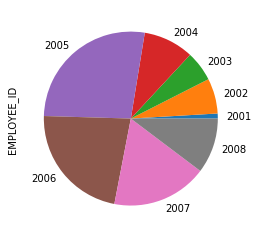

In [16]:
### Vẽ biểu đồ
df_HireYear.plot.pie()